# Task-7 Stock Market Prediction using Numerical and Textual Analysis

# Importing Needed Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import seaborn as sns

In [2]:
import matplotlib as mpl
from matplotlib import style

#Adjusting the size of matplotlib

mpl.rc('figure', figsize = (15 , 15))
mpl.__version__

#Adjusting the style of matplotlib

style.use('ggplot')

# Extracting the Data

In [3]:
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

In [4]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2021, 6, 16)

In [5]:
df = web.DataReader('IDFC.NS','yahoo', start, end)

In [6]:
#Take a look at dataset

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,76.446922,75.299370,75.690025,75.934181,9752599.0,56.071003
2010-01-05,79.547775,76.178345,76.446922,79.205948,17979545.0,58.486931
2010-01-06,81.208069,79.596603,79.596603,80.841827,23085887.0,59.694878
2010-01-07,81.647560,79.865181,81.012741,80.622086,8630755.0,59.532623
2010-01-08,81.256905,79.645439,80.963913,79.938431,5597801.0,59.027798


In [7]:
#Take a look at dataset

df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-10,56.950001,55.349998,56.049999,56.549999,3913531.0,56.549999
2021-06-11,57.099998,56.099998,57.000000,56.650002,2681187.0,56.650002
2021-06-14,59.000000,54.750000,57.099998,56.650002,12189404.0,56.650002
2021-06-15,57.700001,55.599998,57.400002,56.450001,6178131.0,56.450001
2021-06-16,56.750000,55.099998,56.750000,55.549999,3013459.0,55.549999


### Rolling Mean (Moving Average) 
#### to determine trend
The Moving Average makes the line smooth and showcase the increasing or decreasing trend of stocks price.

In [8]:
close_px = df['Adj Close']
mavg = close_px.rolling(window = 100).mean()
mavg.head(10)

Date
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
2010-01-11   NaN
2010-01-12   NaN
2010-01-13   NaN
2010-01-14   NaN
2010-01-15   NaN
Name: Adj Close, dtype: float64

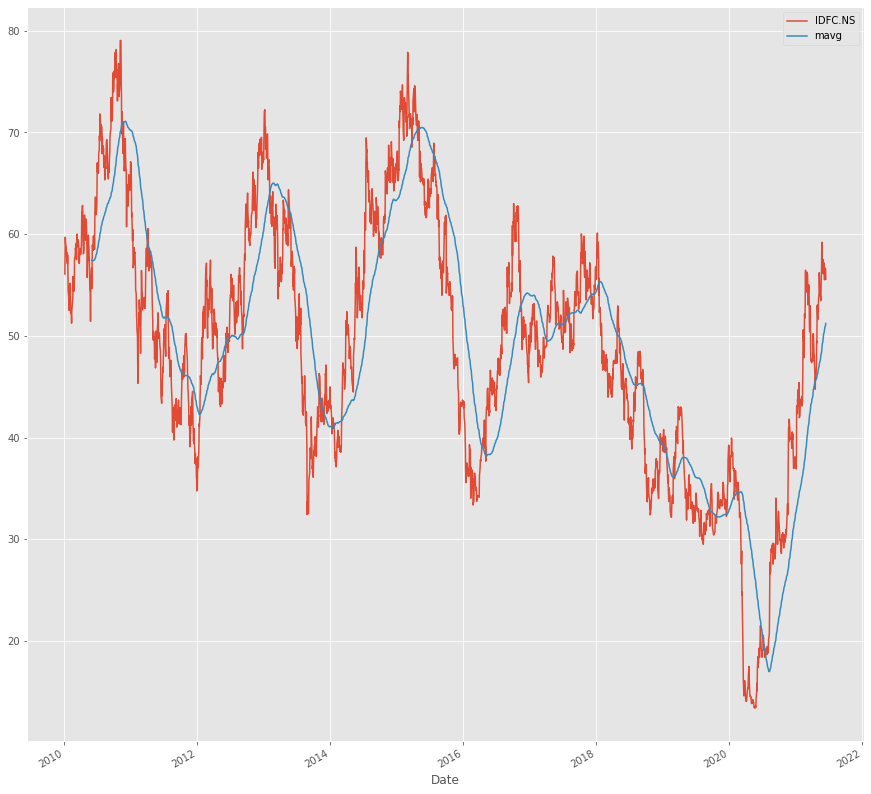

In [9]:
close_px.plot(label = 'IDFC.NS')
mavg.plot(label = 'mavg')
plt.legend()
plt.show()

In this chart, the Moving Average showcases increasing trend the upturn or downturn of stocks price. Logically, you should buy when the stocks are experiencing downturn and sell when the stock and experiencing upturn.

### Return Deviation
#### to determine risk and return

Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment - investopedia

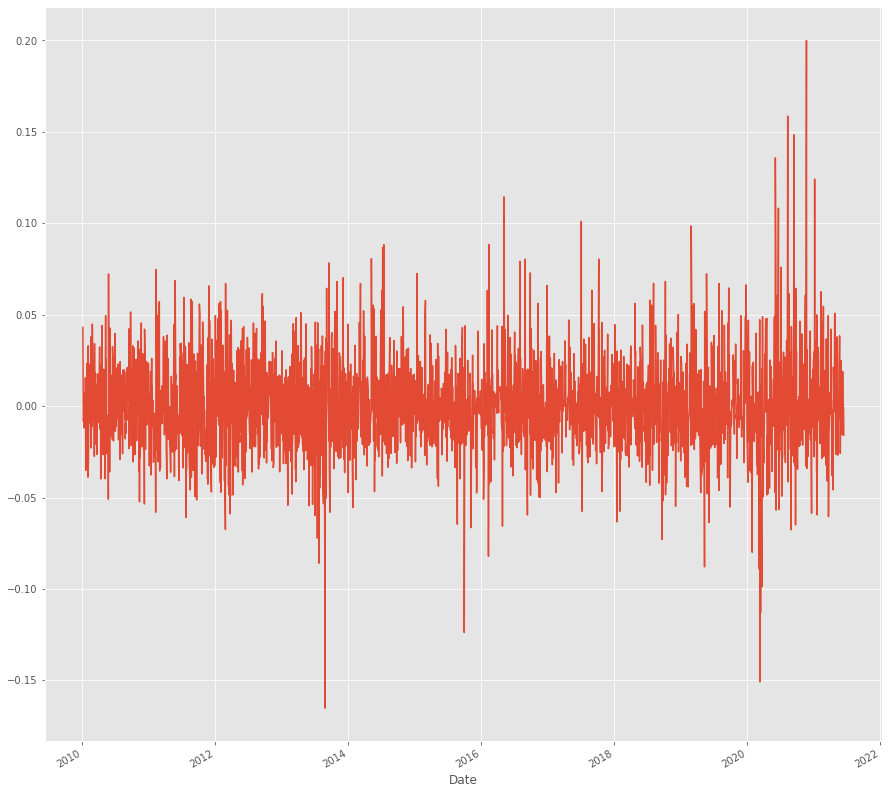

In [10]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label = 'return')
plt.show()

logically, our ideal stocks should return as high and stable as possible. if you are risk averse, you might want to avoid this stocks as you saw the 10% drop in 2013. This decision is heavily subjected to your general sentiment of stocks and competitor analysis.

### Analysis Competitors Stocks

In this segment , we are going to analyse on how one company performs in relative with its competitors. Let'sassume we are intrested in technology companies and want to compare the big guns: Apple, GE, Google, IBM, and Microsoft.

In [11]:
df.comp = web.DataReader(['IDFC.NS','HDB','ICICIBANK.NS','KOTAKBANK.NS','CUB.NS'], 'yahoo', start = start, end = end)['Adj Close']
df.comp.tail(10)

<ipython-input-11-602d403a7306>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.comp = web.DataReader(['IDFC.NS','HDB','ICICIBANK.NS','KOTAKBANK.NS','CUB.NS'], 'yahoo', start = start, end = end)['Adj Close']


Symbols,IDFC.NS,HDB,ICICIBANK.NS,KOTAKBANK.NS,CUB.NS
Date,,,,,
2021-06-03,56.849998,76.769997,650.250000,1814.199951,166.949997
2021-06-04,57.099998,76.839996,642.700012,1811.199951,165.949997
2021-06-07,57.150002,76.919998,648.200012,1814.900024,167.300003
2021-06-08,56.250000,76.949997,642.400024,1793.550049,165.350006
2021-06-09,55.500000,77.250000,636.099976,1782.900024,164.199997
2021-06-10,56.549999,77.239998,640.400024,1799.550049,166.649994
2021-06-11,56.650002,77.459999,635.700012,1794.349976,169.199997
2021-06-14,56.650002,76.720001,635.150024,1768.050049,169.850006
2021-06-15,56.450001,77.339996,645.299988,1770.900024,168.699997


### Correlation Analysis
#### Does one competitor afeect others?

We can analyse the competition by running the percentage change and correlation function in pandas. Percentage change will find how the price changes compared to the previous day which defines returns. Knowing the correlation will help us see whether the returns are affected by other stocks returns

In [12]:
retscomp = df.comp.pct_change()

corr = retscomp.corr()
retscomp.tail(10)

Symbols,IDFC.NS,HDB,ICICIBANK.NS,KOTAKBANK.NS,CUB.NS
Date,,,,,
2021-06-03,-0.011304,0.004580,0.002931,0.017442,-0.001791
2021-06-04,0.004398,0.000912,-0.011611,-0.001654,-0.005990
2021-06-07,0.000876,0.001041,0.008558,0.002043,0.008135
2021-06-08,-0.015748,0.000390,-0.008948,-0.011764,-0.011656
2021-06-09,-0.013333,0.003899,-0.009807,-0.005938,-0.006955
2021-06-10,0.018919,-0.000129,0.006760,0.009339,0.014921
2021-06-11,0.001768,0.002848,-0.007339,-0.002890,0.015302
2021-06-14,0.000000,-0.009553,-0.000865,-0.014657,0.003842
2021-06-15,-0.003530,0.008081,0.015980,0.001612,-0.006771


To prove the positive correlations, we will use heat map to visualize the correlation ranges among the competing stocks. Notice that the lighter the color, the more correlated the two stocks are.

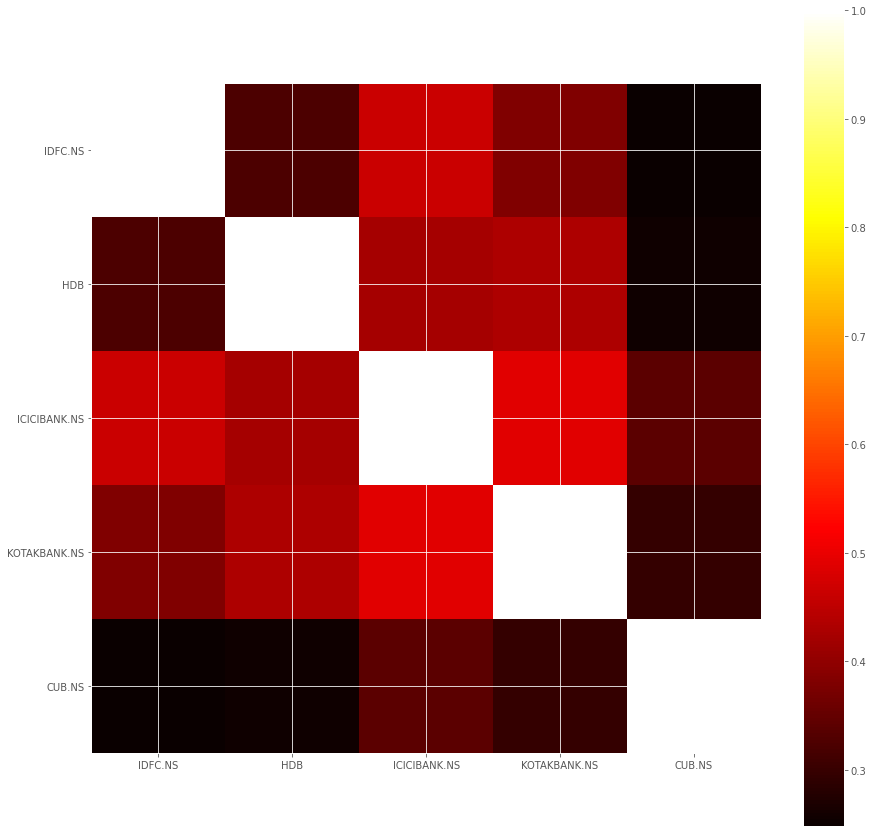

In [13]:
plt.imshow(corr, cmap = 'hot', interpolation = 'none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

From the scatter matrix and heatmap, we can find great correlations among the competing stocks.However, this might not show causally, and could just show the trend in the technology industry rather than show how competing stocks affect each other.

### Stocks Return Rate and Risk

Apart from correlation, we also analyse each stock's risks and returns. In this case we are extracting the average of returns (Return Rate) and the standard deviation of raturns (Risk)

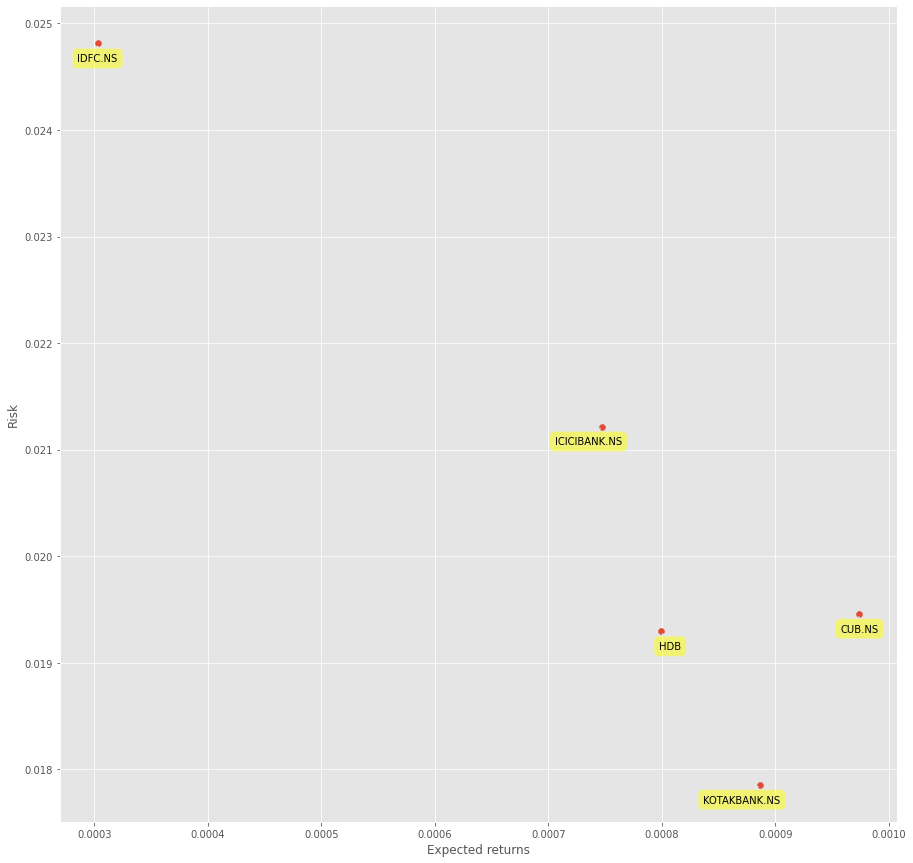

In [14]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(label, xy = (x , y), xytext = (20 , -20), textcoords = 'offset points',
                 ha = 'right', va = 'bottom', bbox = dict(boxstyle = 'round, pad = 0.5', fc = 'yellow',
                 alpha = 0.5), arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = 0'))

### India-News-Headlines file imported and doing Numerical Analysis

In [15]:
df1 = pd.read_csv(r"C:\Users\Admin\Documents\The-Sparks-Foundation-main\india-news-headlines.csv")

In [16]:
#Take a look at dataset

df1.head(10)

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
5,20010102,unknown,Dilute the power of transfers; says Riberio
6,20010102,unknown,Focus shifts to teaching of Hindi
7,20010102,unknown,IT will become compulsory in schools
8,20010102,unknown,Move to stop freedom fighters' pension flayed
9,20010102,unknown,Gilani claims he applied for passport 2 years ago


In [17]:
#Take a look at dataset

df1.tail(10)

,publish_date,headline_category,headline_text
3424057,20201231,india,50 NRIs reach Singhu; offer help to farmers
3424058,20201231,city.amritsar,Navjot Singh Sidhu tweets apology; says 'wore ...
3424059,20201231,city.bengaluru,Azim Premji organisation's name misused to che...
3424060,20201231,india,Get govt nod to probe officials: MP to agencies
3424061,20201231,city.bengaluru,Peddler nabbed; 10kg ganja seized in Anantapur...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...
3424066,20201231,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


### Data Exploration

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


In [19]:
df1.describe()

,publish_date
count,3.424067e+06
mean,2.012659e+07
std,4.981132e+04
min,2.001010e+07
25%,2.009113e+07
50%,2.013092e+07
75%,2.017013e+07
max,2.020123e+07


In [20]:
df1.max()

publish_date                                                  20201231
headline_category                                          young-turks
headline_text        Why should girls have all the fun? Boys prep ...
dtype: object

In [21]:
df1.min()

publish_date                                20010102
headline_category                   2008-in-pictures
headline_text         15cr funds for two auditoriums
dtype: object

In [22]:
df1['headline_category'].unique()

array(['unknown', 'entertainment.hindi.bollywood', 'india', ...,
       'elections.assembly-elections.bihar',
       'astrology.horoscope.monthly', 'astrology.numerology-tarot'],
      dtype=object)

In [23]:
#In case of null values

df1.isnull().any()

publish_date         False
headline_category    False
headline_text        False
dtype: bool

In [24]:
df1.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [25]:
df1.corr(method ='pearson')

,publish_date
publish_date,1.0


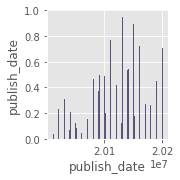

In [26]:
sns.set_palette('magma')
sns.pairplot(df1)
plt.show()

In [27]:
df1['headline_text'].value_counts()

Straight Answers                                                    6723
Cartoons                                                            1536
Straight answers                                                    1500
Photogallery                                                        1353
Your say                                                            1012
                                                                    ... 
Kailas Menon shares a musical memory from the making of 'Finals'       1
Tanaaz Irani back in comedy show                                       1
Ready to dress the world                                               1
Now; BSP leaders woo Vaishya community; offer more tickets             1
Spirit smugglers turn to waterways                                     1
Name: headline_text, Length: 3168800, dtype: int64

In [28]:
df1['headline_category'].value_counts()

india                                           288541
unknown                                         209582
city.mumbai                                     134428
city.delhi                                      127717
business.india-business                         116761
                                                 ...  
preeti-shenoy                                        8
entertainment.hindi.music.singer-of-the-week         8
brandwire.technology.internet-apps                   8
iim-fee-row                                          8
editorialt                                           8
Name: headline_category, Length: 1013, dtype: int64

### Exploratory Data Analysis using NLP and NLTK tools

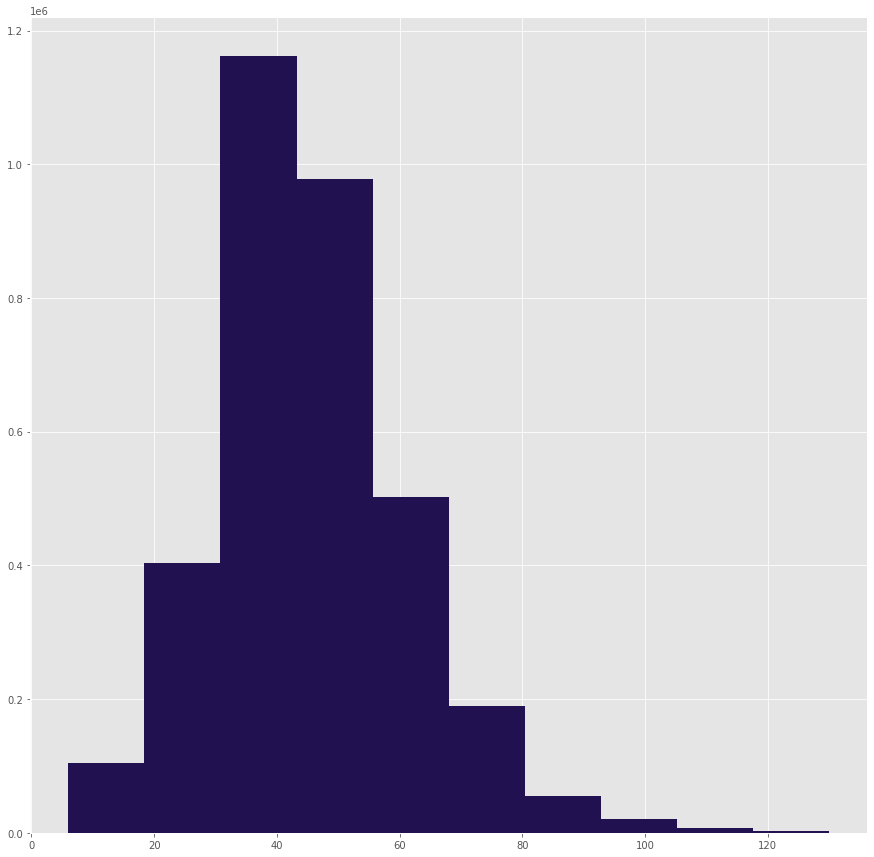

In [29]:
df1['headline_text'].str.len().hist()
plt.show()

This histogram shows that news headlines range from 10 to 70 characters and generally, it is between 25 to 55 characters. now, we will move on to data exploration at a word-level. let's plot the number of words appearing in each news headline.

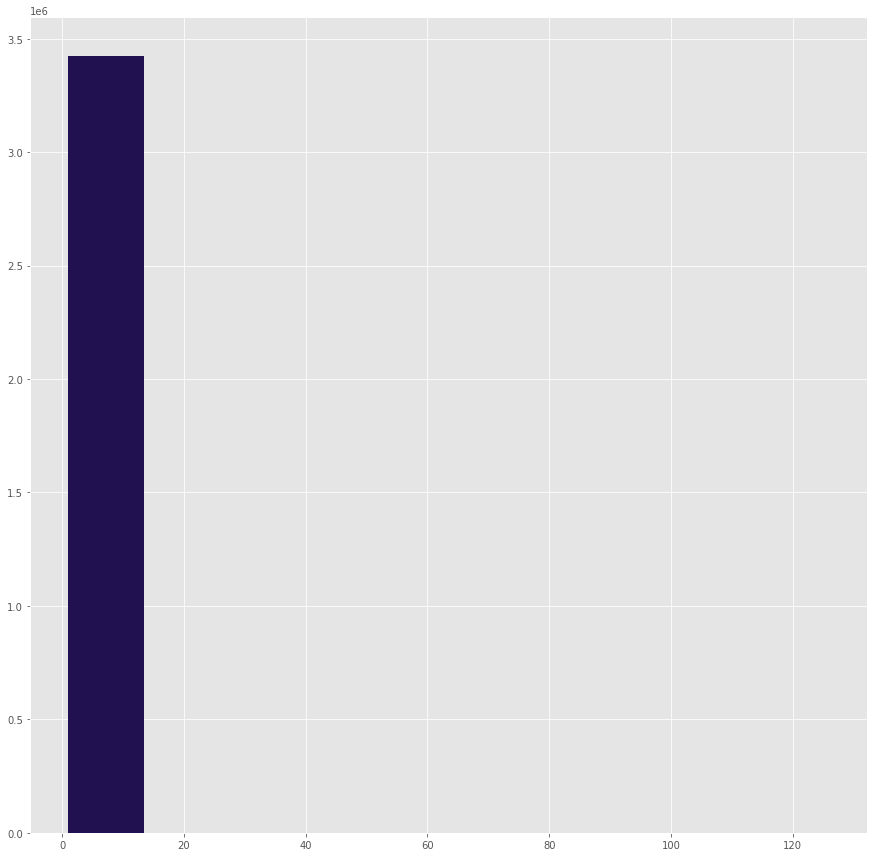

In [30]:
df1['headline_text'].str.split().\
    apply(lambda x : [len(i) for i in x]).\
    map(lambda x : np.mean(x)).hist()
plt.show()

The average word length ranges between 1 to 18 with 10 being the most common length. Does it mean that people are using really short words in news headlines?
Lets find out. One reason, why this may not be true is stopwords. Stopwords are the words that are most commonly used in any language such as "the", "an", "a" etc. As these words probably small in length these words may have caused the above graph to be left-skewed.

Analyzing the amount and the types of stopwords can give us some good insights into the data. To get the corpus containing stopwords you can use the #nltk library. Nltk contains stopwords from many languages, since we are only dealing with english news. I will filter the english stopwords from the corpus

In [31]:


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
corpus = []
new = df1['headline_text'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

In [33]:
from collections import defaultdict

dict = defaultdict(int)
for word in corpus:
    if word in stop:
        dict[word]+=1

Now we know which stopwords occur frquently in our text, let's inspect which words other than these stopwords occur frequently. We will use the counter function from the collection library to count and store the occurrences of each word in a list of tupples. 

In [34]:
from collections import Counter

counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

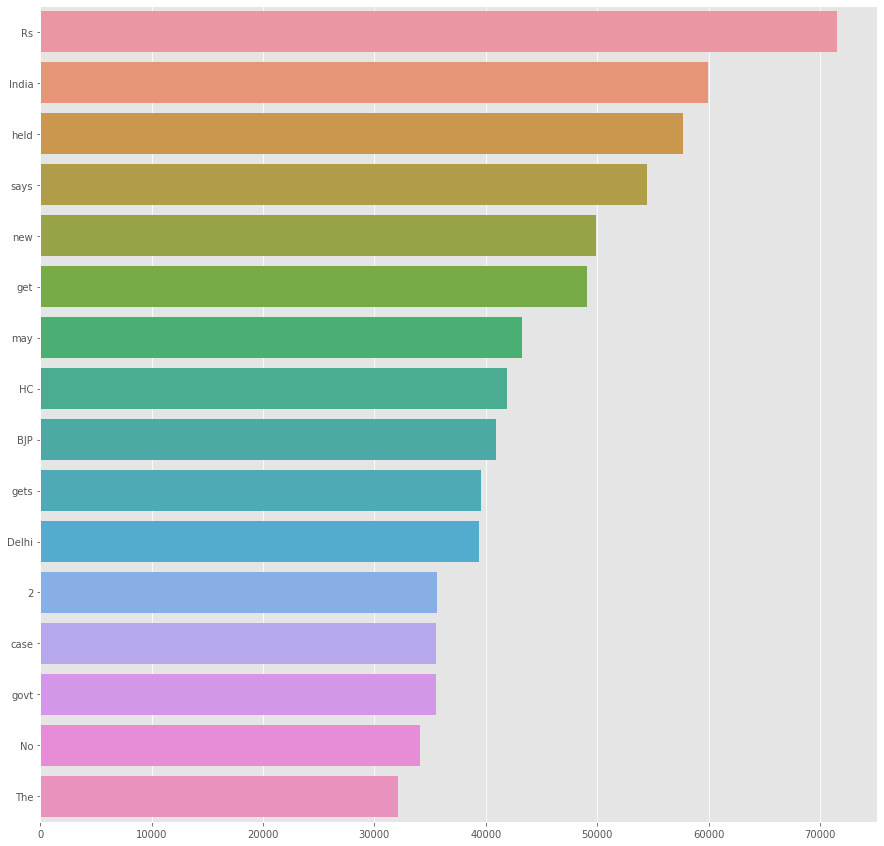

In [35]:
sns.barplot(x = y , y = x)
plt.show()

wow! the "Rs", "India" and "held" dominate the headlines over the last 15 year but when we observe other words in the graph they are all related to the RS - India

### Ngram Exploration

Ngram are simply contiguous sequences of n words. For example "riverbank", "The three muskedteers" etc. If the number of words is 2, It is called bigram. For 3 words it is called a trigram and so on.

In [36]:
from nltk.util import ngrams
list(ngrams(['I' , 'went', 'to', 'the', 'river', 'bank'], 2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n = None):
    vec = CountVectorizer(ngram_range = (n , n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_frq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_feq = sorted(words_frq, key = lambda x : x[1], reverse = True)
    return words_frq[:10]

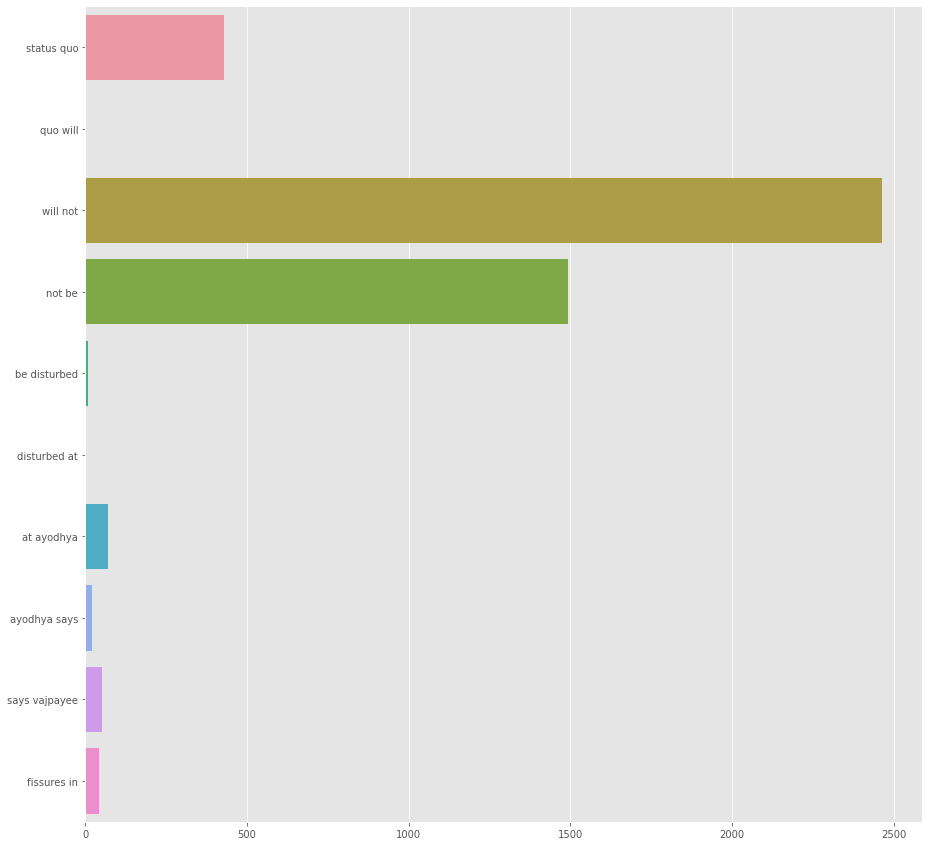

In [38]:
top_n_bigrams = get_top_ngram(df1['headline_text'], 2)[:10]
x,y = map(list, zip(*top_n_bigrams))
sns.barplot(x = y, y = x)
plt.show()

# concatenating all the headline_text column values of same date in publish_date column

### Textblob

In [39]:
from textblob import TextBlob
TextBlob('100 people killed in Iraq').sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)

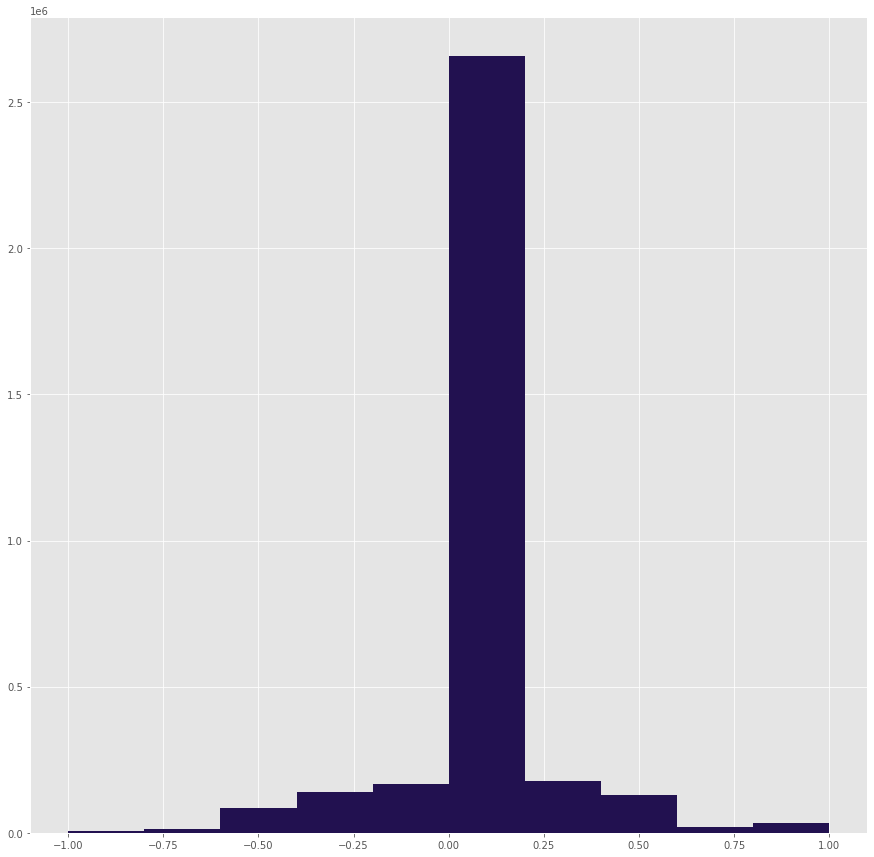

In [41]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
df1['polarity_score'] = df1['headline_text'].\
   apply(lambda x : polarity(x))
df1['polarity_score'].hist()
plt.show()

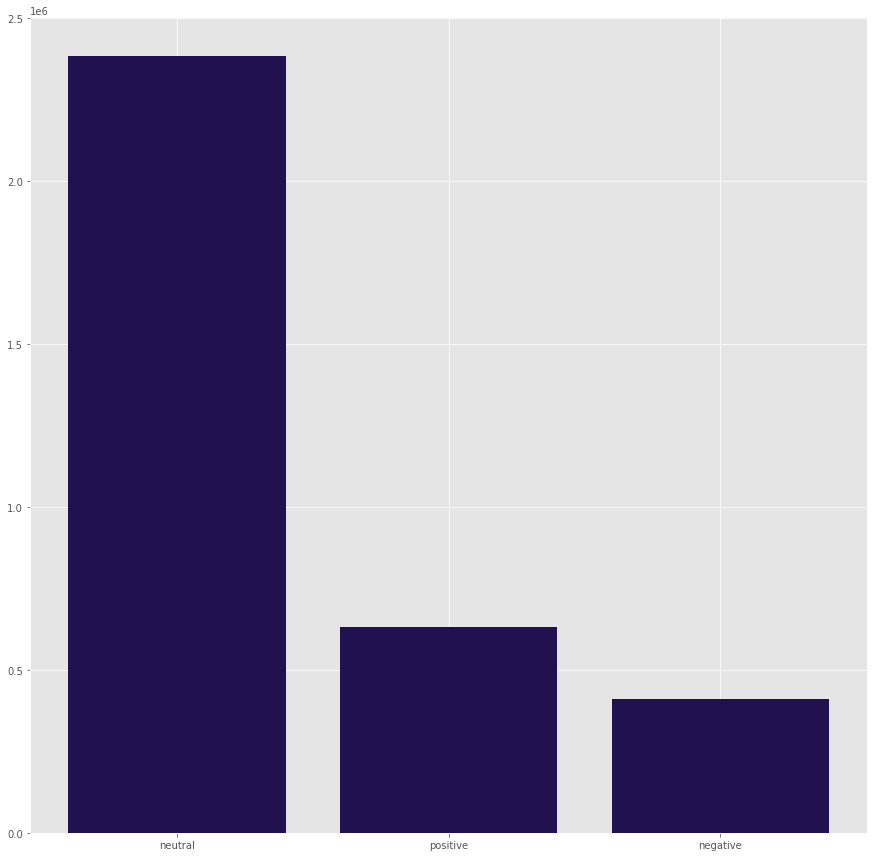

In [42]:
def sentiment(x):
    if x < 0:
        return 'negative'
    elif x == 0:
        return 'neutral'
    else:
        return 'positive'
    
df1['polarity'] = df1['polarity_score'].\
   map(lambda x : sentiment(x))
plt.bar(df1.polarity.value_counts().index,
        df1.polarity.value_counts())
plt.show()

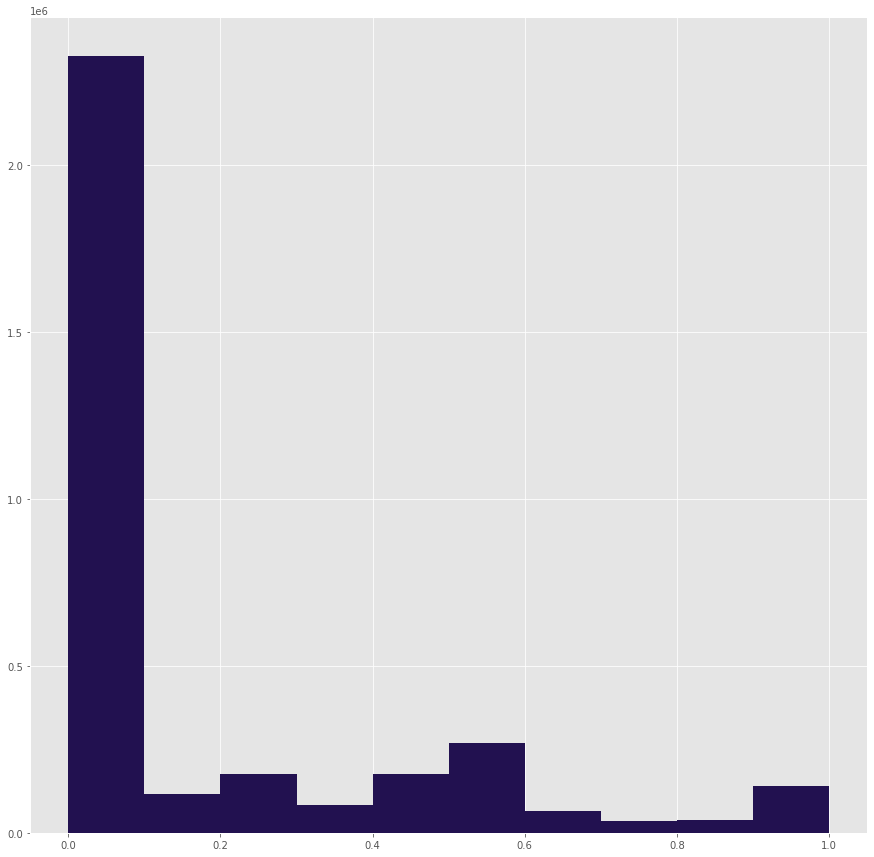

In [43]:
def sub(text):
    return TextBlob(text).sentiment.subjectivity
df1['subjectivity'] = df1['headline_text'].\
   apply(lambda x : sub(x))
df1['subjectivity'].hist()
plt.show()

In [44]:
df1['subjectivity'].head()

0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.241667
Name: subjectivity, dtype: float64

In [45]:
df1[df1['polarity'] == 'positive']['headline_text'].head()

4            Extra buses to clear tourist traffic
12    Will Qureshi's return really help the govt?
30           Extra buses to clear tourist traffic
38    Will Qureshi's return really help the govt?
52          Come to Nandi Hills...and you can fly
Name: headline_text, dtype: object

In [46]:
df1[df1['polarity'] == 'negative']['headline_text'].head()

65         Destroying myths and doubts on sexuality
86         Powerless north India gropes in the dark
104                        10-year-old girl missing
131              Net lottery: A winner or a sucker?
142    Mental illness can pass from parent to child
Name: headline_text, dtype: object

In [47]:
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,76.446922,75.299370,75.690025,75.934181,9752599.0,56.071003
2010-01-05,79.547775,76.178345,76.446922,79.205948,17979545.0,58.486931
2010-01-06,81.208069,79.596603,79.596603,80.841827,23085887.0,59.694878
2010-01-07,81.647560,79.865181,81.012741,80.622086,8630755.0,59.532623
2010-01-08,81.256905,79.645439,80.963913,79.938431,5597801.0,59.027798


In [48]:
df1.head()

,publish_date,headline_category,headline_text,polarity_score,polarity,subjectivity
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,0.00,neutral,0.000000
1,20010102,unknown,Fissures in Hurriyat over Pak visit,0.00,neutral,0.000000
2,20010102,unknown,America's unwanted heading for India?,0.00,neutral,0.000000
3,20010102,unknown,For bigwigs; it is destination Goa,0.00,neutral,0.000000
4,20010102,unknown,Extra buses to clear tourist traffic,0.05,positive,0.241667


# Removing Duplicate Values

In [49]:
df1.duplicated().sum()

24191

In [50]:
df1.duplicated(keep=False).sum()

46130

In [51]:
cols = list(df1.columns)
df1.sort_values(by=cols, inplace=True, ignore_index=True)

In [52]:
df1[df1.duplicated(keep=False)]

,publish_date,headline_category,headline_text,polarity_score,polarity,subjectivity
3,20010102,unknown,America's unwanted heading for India?,0.0,neutral,0.0
4,20010102,unknown,America's unwanted heading for India?,0.0,neutral,0.0
5,20010102,unknown,America's unwanted heading for India?,0.0,neutral,0.0
6,20010102,unknown,America's unwanted heading for India?,0.0,neutral,0.0
9,20010102,unknown,BBC's reality TV will focus on AIIMS,0.0,neutral,0.0
...,...,...,...,...,...,...
3421893,20201227,city.nagpur,Govt forcing helpless sr citizens to fight leg...,0.2,positive,0.2
3422119,20201228,city.bareilly,Rampur's Hunar Haat a platform for artisans fr...,0.0,neutral,0.0
3422120,20201228,city.bareilly,Rampur's Hunar Haat a platform for artisans fr...,0.0,neutral,0.0
3422956,20201229,city.pune,PMC to draft separate DP after 23 villages' me...,0.0,neutral,0.0


In [53]:
df1.drop_duplicates(keep='last', inplace=True, ignore_index=True)

In [54]:
df1.duplicated().sum()

0

In [55]:
df1.shape

(3399876, 6)

# Converting all the headlines of a day to a single date for merging

In [56]:
lst = df1['publish_date'].value_counts().index.tolist()

In [57]:
new = []
for x in lst:
  dff = df1.loc[df1['publish_date'] == x]
  headlinetext = ''
  publishdate = str(x)
  headlinetext = dff['headline_text'].iloc[0]
  for i in range(1 , len(dff)):
    headlinetext = headlinetext + '. '+ dff['headline_text'].iloc[i]  
  new.append(headlinetext)

In [58]:
newsdf = pd.DataFrame({'publish_date': lst, 'headline_text' : new})

In [60]:
newsdf.sort_values(by='publish_date', inplace=True, ignore_index=True)

In [61]:
newsdf.head()

,publish_date,headline_text
0,20010102,Raju Chacha. A noisy effort to spruce up Comme...
1,20010103,'Devdas': Jinxed?. 10-year-old girl missing. 3...
2,20010104,Car dealers caught in Bihar sales tax ruling. ...
3,20010105,Nepal won't allow anti-India activities: Envoy...
4,20010106,Anti-immigration think-tank berates Clinton re...


In [62]:
newsdf.shape

(7262, 2)

In [63]:
polarity = []
subjectivity = []
for idx, row in newsdf.iterrows():
  polarity.append(TextBlob(row['headline_text']).sentiment[0])
  subjectivity.append(TextBlob(row['headline_text']).sentiment[1])

In [64]:
newsdf['polarity'] = polarity
newsdf['subjectivity'] = subjectivity

In [65]:
newsdf.head()

,publish_date,headline_text,polarity,subjectivity
0,20010102,Raju Chacha. A noisy effort to spruce up Comme...,0.193519,0.293056
1,20010103,'Devdas': Jinxed?. 10-year-old girl missing. 3...,0.088462,0.407692
2,20010104,Car dealers caught in Bihar sales tax ruling. ...,0.091426,0.481895
3,20010105,Nepal won't allow anti-India activities: Envoy...,0.257415,0.465542
4,20010106,Anti-immigration think-tank berates Clinton re...,0.219481,0.464935


In [66]:
newsdf.isnull().sum().sum()

0

In [67]:
newsdf.rename(columns={'publish_date': 'date'}, inplace = True)


In [68]:
newsdf = newsdf.filter(['date', 'polarity', 'subjectivity'], axis=1)


In [69]:
newsdf.head()

,date,polarity,subjectivity
0,20010102,0.193519,0.293056
1,20010103,0.088462,0.407692
2,20010104,0.091426,0.481895
3,20010105,0.257415,0.465542
4,20010106,0.219481,0.464935


In [70]:
newsdf['date'] = pd.to_datetime(newsdf['date'], format = '%Y%m%d')

In [71]:
newsdf.tail()

,date,polarity,subjectivity
7257,2020-12-27,0.035346,0.396452
7258,2020-12-28,0.070784,0.414510
7259,2020-12-29,0.061175,0.424021
7260,2020-12-30,0.043919,0.441660
7261,2020-12-31,0.092529,0.406220


# Merging both dataframes

In [72]:
df.reset_index(inplace=True)

In [73]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
2818,2021-06-10,56.950001,55.349998,56.049999,56.549999,3913531.0,56.549999
2819,2021-06-11,57.099998,56.099998,57.000000,56.650002,2681187.0,56.650002
2820,2021-06-14,59.000000,54.750000,57.099998,56.650002,12189404.0,56.650002
2821,2021-06-15,57.700001,55.599998,57.400002,56.450001,6178131.0,56.450001
2822,2021-06-16,56.750000,55.099998,56.750000,55.549999,3013459.0,55.549999


In [74]:
df.rename(columns={'Date': 'date'}, inplace = True)

In [75]:
dood = pd.merge(df, newsdf, how='left', on=['date'])

In [76]:
dood

,date,High,Low,Open,Close,Volume,Adj Close,polarity,subjectivity
0,2010-01-04,76.446922,75.299370,75.690025,75.934181,9752599.0,56.071003,0.052318,0.466683
1,2010-01-05,79.547775,76.178345,76.446922,79.205948,17979545.0,58.486931,0.011885,0.422413
2,2010-01-06,81.208069,79.596603,79.596603,80.841827,23085887.0,59.694878,0.052731,0.427943
3,2010-01-07,81.647560,79.865181,81.012741,80.622086,8630755.0,59.532623,0.036042,0.406683
4,2010-01-08,81.256905,79.645439,80.963913,79.938431,5597801.0,59.027798,0.025808,0.378096
...,...,...,...,...,...,...,...,...,...
2818,2021-06-10,56.950001,55.349998,56.049999,56.549999,3913531.0,56.549999,NaN,NaN
2819,2021-06-11,57.099998,56.099998,57.000000,56.650002,2681187.0,56.650002,NaN,NaN
2820,2021-06-14,59.000000,54.750000,57.099998,56.650002,12189404.0,56.650002,NaN,NaN
2821,2021-06-15,57.700001,55.599998,57.400002,56.450001,6178131.0,56.450001,NaN,NaN


# Passing date to predict

In [77]:
dood.loc[len(dood)] = ['2021-06-17', dood['Open'].mean(), dood['High'].mean(), dood['Low'].mean(),
                       dood['Close'].mean(), dood['Adj Close'].mean(), dood['Volume'].median(), dood['polarity'].mean(), dood['subjectivity'].mean() ]

In [78]:
dood.head()

,date,High,Low,Open,Close,Volume,Adj Close,polarity,subjectivity
0,2010-01-04 00:00:00,76.446922,75.299370,75.690025,75.934181,9752599.0,56.071003,0.052318,0.466683
1,2010-01-05 00:00:00,79.547775,76.178345,76.446922,79.205948,17979545.0,58.486931,0.011885,0.422413
2,2010-01-06 00:00:00,81.208069,79.596603,79.596603,80.841827,23085887.0,59.694878,0.052731,0.427943
3,2010-01-07 00:00:00,81.647560,79.865181,81.012741,80.622086,8630755.0,59.532623,0.036042,0.406683
4,2010-01-08 00:00:00,81.256905,79.645439,80.963913,79.938431,5597801.0,59.027798,0.025808,0.378096


In [79]:
dood.tail()

,date,High,Low,Open,Close,Volume,Adj Close,polarity,subjectivity
2819,2021-06-11 00:00:00,57.099998,56.099998,57.000000,56.650002,2.681187e+06,5.665000e+01,NaN,NaN
2820,2021-06-14 00:00:00,59.000000,54.750000,57.099998,56.650002,1.218940e+07,5.665000e+01,NaN,NaN
2821,2021-06-15 00:00:00,57.700001,55.599998,57.400002,56.450001,6.178131e+06,5.645000e+01,NaN,NaN
2822,2021-06-16 00:00:00,56.750000,55.099998,56.750000,55.549999,3.013459e+06,5.555000e+01,NaN,NaN
2823,2021-06-17,57.859852,58.824608,56.763027,57.732907,4.910660e+01,8.182864e+06,0.064533,0.400701


In [80]:
dood.isnull().sum().sum()

224

In [81]:
dood.fillna(method = 'bfill', inplace = True)

In [82]:
dood.fillna(method = 'ffill', inplace = True)

In [83]:
dood['date'] = pd.to_datetime(dood['date'], errors='coerce')

In [84]:
import datetime as dt

In [85]:
def boolean_shock(percent, df, col):
  data = df.filter(['date', col], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data['percentchg'] = (data[col].pct_change()) * 100  #percentage change compare to previous volume using pct_change() function
  data['shock'] = data['percentchg'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(col, axis = 1, inplace = True)
  return data.dropna()

In [86]:
def priceboolean_shock(percent, df):
  df['date'] = pd.to_datetime(df['date'])
  data = df.filter(['date', 'High', 'Low','Close'], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data['priceavg'] = (data['High'] + data['Low'] + data['Close']) / 3
  data['shock'] = (data['priceavg'].pct_change()) * 100
  data['shock'] = data['shock'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(['High', 'Low', 'Close'], axis = 1, inplace = True)
  return data

In [87]:
def reverseboolean_shock(percent, df, col):
  data = df.filter(['date', col], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data = data.reindex(index=data.index[::-1])
  data['percentchg'] = (data[col].pct_change()) * 100
  data['shock'] = data['percentchg'].apply(lambda x: 1 if x > percent else 0)
  data.drop(col, axis = 1, inplace = True)
  data = data.reindex(index=data.index[::-1])
  return data.dropna()

In [88]:
def pricereverseboolean_shock(percent, df):
  data = df.filter(['date', 'High', 'Low','Close'], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data = data.reindex(index=data.index[::-1])
  data['reversepriceavg'] = (data['High'] + data['Low'] + data['Close']) / 3
  data['shock'] = (data['reversepriceavg'].pct_change()) * 100
  data['shock'] = data['shock'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(['High', 'Low', 'Close'], axis = 1, inplace = True)
  data = data.reindex(index=data.index[::-1])
  return data.dropna()

# Making dataframe ready for the model

In [89]:
dood["month"] = dood['date'].dt.month
dood["day"] = dood['date'].dt.day
dood["dayofweek"] = dood['date'].dt.dayofweek
dood["week"] = dood['date'].dt.week
dood['movingavg4weeks'] = round(dood['Close'].rolling(window=(4*5), min_periods = 1).mean().shift(),2)
dood['movingavg16weeks'] = round(dood['Close'].rolling(window=(16*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 4 weeks 
dood['movingavg28weeks'] = round(dood['Close'].rolling(window=(28*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 16 weeks
dood['movingavg40weeks'] = round(dood['Close'].rolling(window=(40*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 28 weeks
dood['movingavg52weeks'] = round(dood['Close'].rolling(window=(52*5), min_periods = 1).mean().shift(),2)  #add 12 weeks to 40 weeks
dood['window10days'] = round(dood['Close'].rolling(window = 10, min_periods = 1).mean().shift(),2)  
dood['window50days'] = round(dood['Close'].rolling(window = 50, min_periods = 1).mean().shift(),2)
dood['volumeshock'] = round(boolean_shock(10, dood,'Volume').reset_index()['shock'], 2)
dood['closeshock2'] = round(reverseboolean_shock(2, dood, 'Close').reset_index()['shock'], 2)
dood['closeshock5'] = round(reverseboolean_shock(5, dood, 'Close').reset_index()['shock'],2)
dood['closeshock10'] = round(reverseboolean_shock(10, dood, 'Close').reset_index()['shock'], 2)
dood['priceshock'] = round(priceboolean_shock(10, dood).reset_index()['shock'], 2)
dood['reversebooleanshock2'] = round(reverseboolean_shock(2, dood, 'Close').reset_index()['shock'], 2)
dood['reversebooleanshock5'] = round(reverseboolean_shock(5, dood, 'Close').reset_index()['shock'], 2)
dood['pricereverseshock2'] = round(pricereverseboolean_shock(2, dood).reset_index()['shock'], 2)
dood['polarity'] = round(dood['polarity'] , 2)
dood['subjectivity'] = round(dood['subjectivity'] , 2)
dood['price'] = round((dood['High'] + dood['Low'] + dood['Close']) / 3 , 2)
dood['Close'] = round(dood['Close'] , 2)

<ipython-input-89-b456045663bf>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dood["week"] = dood['date'].dt.week


In [90]:
dood

,date,High,Low,Open,Close,Volume,Adj Close,polarity,subjectivity,month,...,window50days,volumeshock,closeshock2,closeshock5,closeshock10,priceshock,reversebooleanshock2,reversebooleanshock5,pricereverseshock2,price
0,2010-01-04,76.446922,75.299370,75.690025,75.93,9.752599e+06,5.607100e+01,0.05,0.47,1,...,NaN,1.0,0.0,0.0,0.0,0,0.0,0.0,0,75.89
1,2010-01-05,79.547775,76.178345,76.446922,79.21,1.797954e+07,5.848693e+01,0.01,0.42,1,...,75.93,1.0,0.0,0.0,0.0,0,0.0,0.0,0,78.31
2,2010-01-06,81.208069,79.596603,79.596603,80.84,2.308589e+07,5.969488e+01,0.05,0.43,1,...,77.57,0.0,0.0,0.0,0.0,0,0.0,0.0,0,80.55
3,2010-01-07,81.647560,79.865181,81.012741,80.62,8.630755e+06,5.953262e+01,0.04,0.41,1,...,78.66,0.0,0.0,0.0,0.0,0,0.0,0.0,0,80.71
4,2010-01-08,81.256905,79.645439,80.963913,79.94,5.597801e+06,5.902780e+01,0.03,0.38,1,...,79.15,0.0,0.0,0.0,0.0,0,0.0,0.0,0,80.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,2021-06-11,57.099998,56.099998,57.000000,56.65,2.681187e+06,5.665000e+01,0.06,0.40,6,...,52.27,1.0,0.0,0.0,0.0,0,0.0,0.0,0,56.62
2820,2021-06-14,59.000000,54.750000,57.099998,56.65,1.218940e+07,5.665000e+01,0.06,0.40,6,...,52.45,0.0,0.0,0.0,0.0,0,0.0,0.0,0,56.80
2821,2021-06-15,57.700001,55.599998,57.400002,56.45,6.178131e+06,5.645000e+01,0.06,0.40,6,...,52.64,0.0,0.0,0.0,0.0,0,0.0,0.0,0,56.58
2822,2021-06-16,56.750000,55.099998,56.750000,55.55,3.013459e+06,5.555000e+01,0.06,0.40,6,...,52.82,0.0,0.0,0.0,0.0,0,0.0,0.0,0,55.80


In [91]:
dood.fillna(method = 'bfill', inplace = True)

In [92]:
dood.fillna(method = 'ffill', inplace = True)

In [93]:
dood.isnull().sum().sum()

0

In [94]:
dood = dood.filter(['month', 'day', 'dayofweek', 'week',
       'movingavg4weeks', 'movingavg16weeks', 'movingavg28weeks',
       'movingavg40weeks', 'movingavg52weeks', 'window10days', 'window50days',
       'volumeshock', 'closeshock2', 'closeshock5', 'closeshock10',
       'priceshock', 'reversebooleanshock2', 'reversebooleanshock5',
       'pricereverseshock2', 'polarity', 'subjectivity', 'price', 'Close'], axis=1)

In [95]:
dood = dood.iloc[:,:2823].reset_index()

In [96]:
dood

,index,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,...,closeshock5,closeshock10,priceshock,reversebooleanshock2,reversebooleanshock5,pricereverseshock2,polarity,subjectivity,price,Close
0,0,1,4,0,1,75.93,75.93,75.93,75.93,75.93,...,0.0,0.0,0,0.0,0.0,0,0.05,0.47,75.89,75.93
1,1,1,5,1,1,75.93,75.93,75.93,75.93,75.93,...,0.0,0.0,0,0.0,0.0,0,0.01,0.42,78.31,79.21
2,2,1,6,2,1,77.57,77.57,77.57,77.57,77.57,...,0.0,0.0,0,0.0,0.0,0,0.05,0.43,80.55,80.84
3,3,1,7,3,1,78.66,78.66,78.66,78.66,78.66,...,0.0,0.0,0,0.0,0.0,0,0.04,0.41,80.71,80.62
4,4,1,8,4,1,79.15,79.15,79.15,79.15,79.15,...,0.0,0.0,0,0.0,0.0,0,0.03,0.38,80.28,79.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,2819,6,11,4,23,56.15,52.43,47.28,42.11,36.92,...,0.0,0.0,0,0.0,0.0,0,0.06,0.40,56.62,56.65
2820,2820,6,14,0,24,56.27,52.51,47.46,42.25,37.09,...,0.0,0.0,0,0.0,0.0,0,0.06,0.40,56.80,56.65
2821,2821,6,15,1,24,56.40,52.58,47.62,42.39,37.25,...,0.0,0.0,0,0.0,0.0,0,0.06,0.40,56.58,56.45
2822,2822,6,16,2,24,56.53,52.67,47.79,42.53,37.41,...,0.0,0.0,0,0.0,0.0,0,0.06,0.40,55.80,55.55


In [97]:
X = dood.drop(['price','Close'], axis = 1)
y = dood[['price','Close']]

In [98]:
X.shape, y.shape

((2824, 22), (2824, 2))

In [99]:
import statsmodels.api as sm 

from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor

In [100]:
split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [101]:
 X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2259, 22), (2259, 2), (565, 22), (565, 2))

In [102]:
rfg = RandomForestRegressor(random_state = 42, n_estimators = 500, criterion='mse', max_depth = 30, min_samples_leaf=2, min_samples_split=5, n_jobs=1)

In [103]:
chainedmodel = RegressorChain(rfg)
chainedmodel.fit(X_train, y_train)

RegressorChain(base_estimator=RandomForestRegressor(max_depth=30,
                                                    min_samples_leaf=2,
                                                    min_samples_split=5,
                                                    n_estimators=500, n_jobs=1,
                                                    random_state=42))

In [104]:
pred = chainedmodel.predict(X_test)
print(pred)
roundpred = []
for x in range(len(pred)):
  roundpred.append([round(pred[x][0], 2),round(pred[x][1], 2) ])

[[39.75564691 40.01755197]
 [77.86257977 77.96848254]
 [40.12461464 40.06516384]
 ...
 [60.63194472 60.7366264 ]
 [82.99250926 82.75275793]
 [72.361001   72.26026002]]


In [105]:
r2_score(y_test, roundpred) 

0.9901420676357938

In [106]:
print('MAE')
print(mean_absolute_error(y_test, roundpred), end='\n')
#MSE
print('MSE')
print(mean_squared_error(y_test, roundpred), end='\n')
#RMSE
print('RMSE')
print(np.sqrt(mean_squared_error(y_test, roundpred)))

MAE
1.2786725663716814
MSE
3.110602654867257
RMSE
1.7636900676896883


In [107]:
datatopredict = dood.iloc[2823:,:]

In [108]:
datatopredict

,index,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,...,closeshock5,closeshock10,priceshock,reversebooleanshock2,reversebooleanshock5,pricereverseshock2,polarity,subjectivity,price,Close
2823,2823,6,17,3,24,56.64,52.77,47.95,42.66,37.56,...,0.0,0.0,0,0.0,0.0,0,0.06,0.4,58.14,57.73


In [109]:
mydata = datatopredict.drop(['price','Close'], axis = 1)

In [110]:
final = chainedmodel.predict(mydata)

In [111]:
final

array([[57.26310608, 57.06314814]])

In [113]:
[(round(final[0][0], 2)),(round(final[0][1], 2))]

[57.26, 57.06]

In [114]:
start = datetime.datetime(2021, 6,17 )
end = datetime.datetime(2021, 6, 17)

In [115]:
dfc = web.DataReader("IDFC.NS", 'yahoo', start, end)

In [116]:
dfc.reset_index(inplace=True)

In [117]:
dfc.rename(columns={'Date': 'date'}, inplace = True)

In [118]:
dfc['date'] = pd.to_datetime(dfc['date'], format = '%Y%m%d')

In [119]:
unseenbsedata_price = round((dfc['High'] + dfc['Low'] + dfc['Close'])/ 3, 2)

In [120]:
[unseenbsedata_price[0] , round(dfc['Close'],2)[0]]

[55.15, 54.75]